# Study Notebook

In [1]:
import os, json
import collections
from datetime import datetime
from IPython.display import display
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from iMahir import Study

In [4]:
home_dir = os.path.expanduser('~/')
hebrew = os.path.join(home_dir, 'Documents/vocabulary/hebrew.json')

In [5]:
heb = Study(hebrew)

preparing TF...
This is Text-Fabric 7.8.4
Api reference : https://annotation.github.io/text-fabric/Api/Fabric/

115 features found and 0 ignored
  0.00s loading features ...
   |     0.00s No structure info in otext, the structure part of the T-API cannot be used
  4.16s All features loaded/computed - for details use loadLog()


hebrew ready for study.
this is session 9:
score 4: 5 terms
score 3: 189 terms
score 2: 9 terms
score 1: 11 terms
score 0: 50 terms
total: 264


In [6]:
heb.learn()

The following scores were changed 
1->2 		 8
1->3 		 1
2->3 		 5
0->1 		 4
0->2 		 3
0->3 		 8

duration:  1:04:46.215503


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

### Notes

* Consider merging מעון and מענה
* Total time spent on terms averages to about 10-11 seconds per term. 



## Study Stats

### Size of Known Term Set (Scores 3-4)

In [7]:
scores = [sd.get('score_counts', None) for sd in heb.set_data['stats']]
scores = [s for s in scores if s] 
plt_scores = [s['3'] for s in scores]
times = [datetime.strptime(sd['date'], '%Y-%m-%d %H:%M:%S.%f') for sd in heb.set_data['stats']]
time_labels = [datetime.strftime(time, format='%d-%m') for time in times]

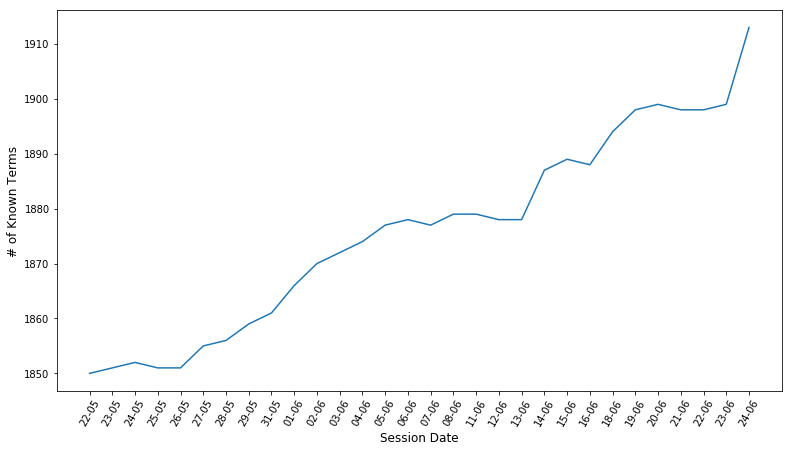

In [8]:
cutoff = -30
x = np.arange(len(time_labels[cutoff:]))
plt.figure(figsize=(13, 7))
plt.plot(x, plt_scores[cutoff:])
plt.xticks(x, time_labels[cutoff:], rotation=60)
plt.ylabel('# of Known Terms', size=12)
plt.xlabel('Session Date', size=12)
plt.show()

### Kinds of Score 0's Left

total unlearned terms: 788


,0
9,2
8,23
7,121
6,165
5,211
4,266


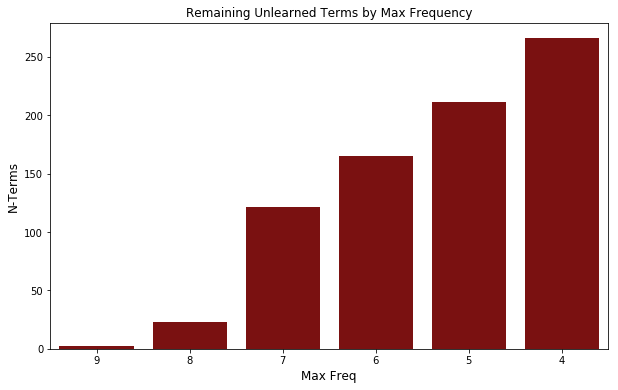

In [10]:
zeros = collections.Counter()

for i in heb.set_data['term_queues']['0']:
    
    term_lexs = heb.set_data['terms_dict'][i]['source_lexemes']
     
    for term in term_lexs:
        freq = heb.F.freq_lex.v(term)
        zeros[freq] += 1
            
zeros = pd.DataFrame.from_dict(zeros, orient='index').sort_values(by=0)
print(f'total unlearned terms: {zeros[0].sum()}')
display(zeros)
nbars = np.arange(zeros.shape[0])
plt.figure(figsize=(10, 6))
sns.barplot(nbars, zeros[0], color='darkred')
plt.xticks(nbars, labels=list(str(i) for i in zeros.index))
plt.ylabel('N-Terms', size=12)
plt.xlabel('Max Freq', size=12)
plt.title('Remaining Unlearned Terms by Max Frequency')
plt.show()